# 문제정의
- 데이터 전처리 및 시각화 방법에 대해 학습

# 데이터 수집

In [1]:
import pandas as pd

# index_col : 인덱스 컬럼을 설정
train = pd.read_csv("./data/titanic_train.csv",index_col="PassengerId")
test = pd.read_csv("./data/titanic_test.csv",index_col="PassengerId")


# 탐색적 데이터 분석
<table border=0 align=left width=700>
  <tr><th>feature<th width=200>의미<th width=300>설명<th> 타입
  <tr><td>Survivied<td>생존여부<td>target 라벨 (0 : 사망, 1 : 생존)<td>integer
  <tr><td>Pclass<td>티켓의 클래스<td>1 = 1등석, 2 = 2등석, 3 = 3등석<td>integer
  <tr><td>Name<td>이름<td>호칭과 이름으로 구성<td>string
  <tr><td>Sex<td>성별<td>male, female로 구분<td>string
  <tr><td>Age<td>나이<td>0-80세<td>integer
  <tr><td>SibSp<td>함께 탑승한 형제와 배우자의 수<td><td>integer
  <tr><td>Parch<td>함께 탑승한 부모, 아이의 수<td><td>integer
  <tr><td>Ticket<td>티켓 번호<td>alphabat + integer<td>string
  <tr><td>Fare<td>탑승료<td><td>float
  <tr><td>Cabin<td>객실 번호<td>alphabat + integer<td>string
  <tr><td>Embarked<td>탑승 항구<td>C = Cherbourg, Q = Queenstown, S = Southampton<td>string
</table>

In [2]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


## 탐색적 데이터 분석 및 전처리

- 데이터 이해를 이해하자
- 결측치(컬럼에 값이 없는 데이터), 이상치(다른 값들과 차이가 큰 값), 오류가 있는지 확인
- 기술통계
- 상관관계
- 시각화

## 결측치 확인

- info(), describe(), isnull()과 sum()함수 등을 이용

In [3]:
# 훈련 데이터의 결측치
train.info()

#Age, Cabin, Embarked에 결측치가 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
test.info()

# Age, Fare, Cabin에 결측치가 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- 결측치 채우는 방법
    - 수치형인 경우
        - 기술통계(평균, 중간값)
        - 결측치가 많은 경우 : 결측치가 있는 데이터의 다른 컬럼과 같은 값을 갖는 데이터의 결측치 통계를 사용
    - 범주형인 경우
        - 결측치가 적은 경우 : 데이터수가 가장 많은 클래스로 할당 -> 기존 데이터가 결측치가 있는데이터에 의해
          영향을 덜 받기 떄문에)
        - 결측치가 많은 경우 : 데이터수가 가장 많ㅇㄴ 클래스로 할랑 -> 편향이됨 -> 기존 데이터의 개수 비율만큼 랜엄으로 할당 

In [5]:
# 결측치 개수 확인
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# 등급볍(Pclass) 통계 (평균)
# groupby() : 원하는 컬럼으 중심으로 그룹핑해주는 함수
# Pclass 컬럼의 클래스별로 각 컬럼의 평균을 계산
train.groupby("Pclass").mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


- 1등실 생존율이 높았다
- 나이를 보면 3등실에 나이가 적은 승객이 많았다
- 1등실일수록 가족수가 적었다. 3등실일수록 가족수가 많았다.

In [9]:
train.groupby(["Pclass","Survived"]).mean()

Age     SibSp     Parch       Fare
Pclass Survived                                          
1      0         43.695312  0.287500  0.300000  64.684007
       1         35.368197  0.492647  0.389706  95.608029
2      0         33.544444  0.319588  0.144330  19.412328
       1         25.901566  0.494253  0.643678  22.055700
3      0         26.555556  0.672043  0.384409  13.669364
       1         20.646118  0.436975  0.420168  13.694887

- 3등실 승객의 사망/생존자의 요금은 비슷하다
- 1등실 승객의 사망/생존자의 요금은 생존자의 요금이 더 비쌋다.
- 같은 클래스에서 나이가 어릴수록 생존이 높았다.

## Age 결측치 채우기

- 결측치가 있는 데이터의 다른 컬럼의 값과 같은 데이터의 평균값을 사용해서 결측치를 채움

- 그럼 어떤 컬럼을 참조할까요?
    - 결측치가 있는 컬럼(Age)와 상관관계가 높은 컬럼 선택(범주형)
    
- 피벗 테이블을 활용

- apply()을 이용하여 전체 데이터에 결측치를 채움
    - 데이터프레임의 데이터를 분리해서 원하는 처리를 수행한 후 다시 병합하는 함수 - 재구조화 함수 (reconstruct function)
    

In [10]:
# Age 컬럼과 상관관계가 높은 컬럼 찾기
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [11]:
# 피벗 테이블 생성
# values : 결측치를 채울 컬럼
# index : 참고할 컬럼 목록 리스트
# aggtunce : 사용할 수학 도구 (평균, 중간값)
pt1 = train.pivot_table(values = "Age",
                        index = ["Pclass", "Sex"],
                        aggfunc = "mean")
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [12]:
# 피벗 테이블에 접근하는 방법
pt1.loc[1, "male"]

Age    41.281386
Name: (1, male), dtype: float64

In [13]:
import numpy as np
# Age 컬럼의 결측치를 채우는 함수
def fill_age(row) :
    # 한 줄 데이터에서  Age 컬럼이 결측치라면
    if np.isnan(row["Age"]) :
        # 피벗 테이블을 참조 (같은 Pclass와 Sex인 값을 반환)
        return pt1.loc[row["Pclass"], row["Sex"]]
    # 결측치가 아닌 경우
    else:
        return row["Age"]

In [14]:
# axis=1 : 한 줄씩 넘긴다
# astype("int64") : 나이는 실수가 없으니 정수로 변환
train["Age"] = train.apply(fill_age, axis=1).astype("int64")
test["Age"] = test.apply(fill_age, axis=1).astype("int64")

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


## train 데이터의 Embarked 결측치 채우기




In [16]:
# 가장 많은 데이터수를 갖는 클래스로 결측치를 할당
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
# Embarked 컬럼이 결측치인 값을 S로 채운다
train["Embarked"] = train["Embarked"].fillna("S")

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


## test데이터의 Fare 결측치 채우기


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [20]:
# 결측치가 있는 데이터를 확인
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [21]:
pt2 = test.pivot_table(values = "Fare",
                        index = ["Pclass", "Embarked"],
                        aggfunc = "mean")
pt2

Fare
Pclass Embarked            
1      C         110.073511
       Q          90.000000
       S          76.677504
2      C          20.120445
       Q          11.273950
       S          23.056090
3      C          10.658700
       Q           8.998985
       S          13.913030

In [22]:
test["Fare"] = test["Fare"].fillna(130913030)
# 이 방식도 가능 // test["Fare"] = test["Fare"].fillna(float(pt2.loc[3, "S"]))

In [23]:
# pt2.loc[3, "S"]

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


## Cabin 결측치 채우기
- 결측치가 실제 객실이 없는 승객이었을 가능성이 있으므로 원래값에 중복되지 않는 영문자 채움
- 원래 객실번호의 첫번째 영문자 추출

In [25]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [26]:
# 결측치를 M으로 채움
train["Cabin"] = train["Cabin"].fillna("M")
test["Cabin"] = test["Cabin"].fillna("M")

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [28]:
# 원래 객실번호의 첫번째 영문자 추출
train["Cabin"] = train["Cabin"].str[0]
test["Cabin"] = test["Cabin"].str[0]

In [29]:
train["Cabin"].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

## 데이터 시각화 하기^^
- test데이터를 활용하지 않고 train데이터를 이용해서 시각화/탐색하는게 좋다.


### 범주형 데이터 시각화  
(시각 데이터/키, 몸무게)(범주 데이터/성별, 혈액형)
- 범주 빈도의 barchat를 많이 활용


In [30]:
# matplotlib 기반의 데이터 시각화 라이브러리
import seaborn as sns

#### Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

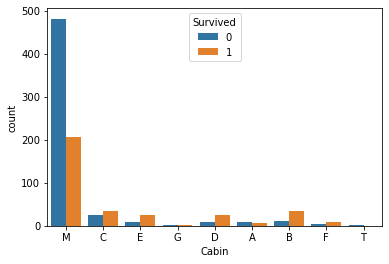

In [31]:
sns.countplot (data=train, #사용할 데이터 지정
               x = "Cabin", #x축에서 범주로 사용할 컬러 지정
               hue = "Survived") # 각 범주를 분리할 걸럼 지정 

- B, D 같은 경우는 살아남기에 괜찮은 객실일 수 있다.
- M같은 경우는 죽은 사람들의 비율이 엄청 높다

#### Pclass 시각화

<AxesSubplot:xlabel='Pclass', ylabel='count'>

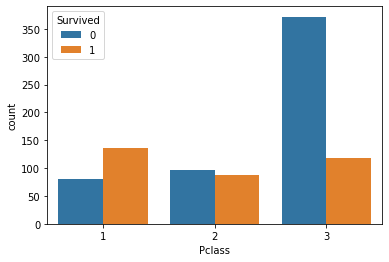

In [32]:
sns.countplot (data=train, #사용할 데이터 지정
               x = "Pclass", #x축에서 범주로 사용할 컬러 지정
               hue = "Survived") # 각 범주를 분리할 걸럼 지정 

- 1등급은 산사람의 비율이 좀 더 높고, 3등급은 죽은사람의 비율이 좀 더 높다.

#### Cabin & Pclass 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

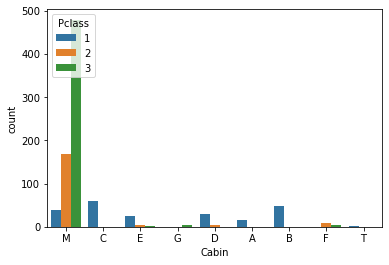

In [33]:
sns.countplot (data=train, #사용할 데이터 지정
               x = "Cabin", #x축에서 범주로 사용할 컬러 지정
               hue = "Pclass") # 각 범주를 분리할 걸럼 지정 

- M에는 3등급이 많이 있어서 죽은사람의 비율이 높아보인거 같아.
- M이 생존여부 판단에는 도움이 덜 될수 있겠다.

### 수치형 데이터 시각화
- 구간을 나눠서 종합하는 히스토그램
- 커널밀도 추정 그래프

#### matplotlib hist함수

In [34]:
import matplotlib.pyplot as plt

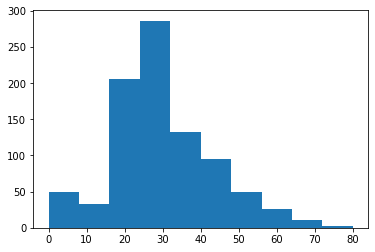

In [35]:
plt.hist(train['Age'], bins=10)
plt.show()

#### seaborn histplot 함수

<AxesSubplot:xlabel='Age', ylabel='Count'>

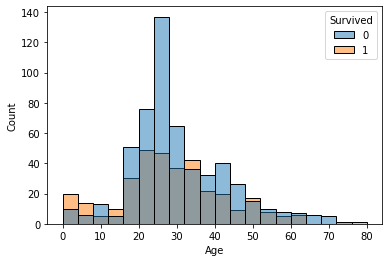

In [36]:
sns.histplot(data=train, x = train['Age'], bins=20, hue= 'Survived')

- 20대 중~후반 사람들이 죽은 비율이 높다.
- 10살 미만의 사람들이 산 비율이 약간 높다.

#### 커널밀도추정 그래프 시각화

<AxesSubplot:xlabel='Fare', ylabel='Density'>

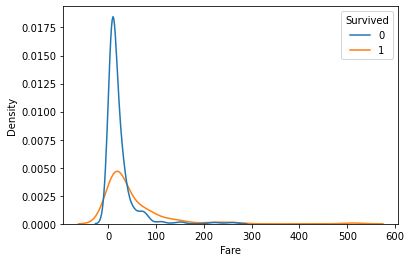

In [37]:
# 요금 데이터 시각화
sns.kdeplot(data=train, x=train['Fare'], hue='Survived')

- 0~40달러 사이의 사람은 죽은 사람의 밀도가 높다.
- 200달러 이상의 사람은 산 사람의 밀도가 아주 살짝 높다.

#### 바이올린플롯 그래프 시각화
- 박스 + KDA 그래프

<AxesSubplot:xlabel='Sex', ylabel='Age'>

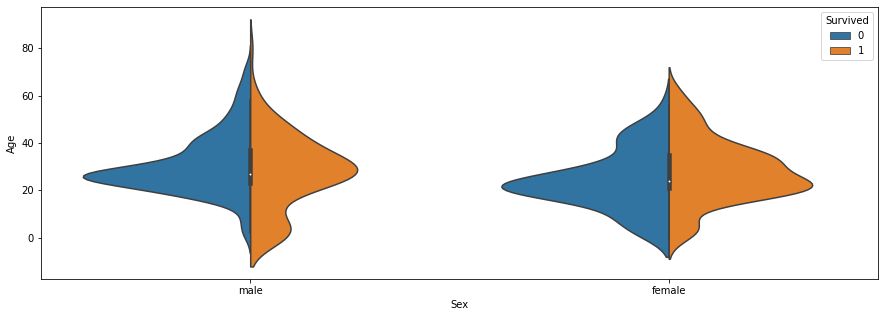

In [38]:
plt.figure(figsize=(15,5)) # 그림의 가로, 세로 크기 설정
sns.violinplot(data=train, # 사용할 데이터
              x = 'Sex',
              y = 'Age',
              hue = 'Survived',
              split=True)

### 텍스트 데이터
- 비정형 데이터는 단어중심 시각화
- wordcloud
- 빈도기반의 시각화 활용가능


# 특성공학
- feature(특성)에서 유의미한 컬럼을 추출하거나 병합하는 행위

In [39]:
train.columns # columns(=세로단)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 가족 컬럼을 만들어보자.
- SibSp와 Parch를 병합하자

<AxesSubplot:xlabel='SibSp', ylabel='count'>

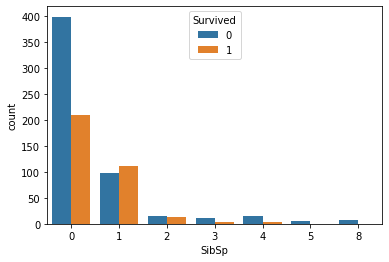

In [40]:
sns.countplot(data=train,
              x= 'SibSp',
              hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

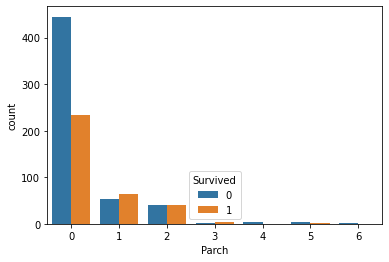

In [41]:
sns.countplot(data=train,
              x= 'Parch',
              hue='Survived')

In [42]:
train['Family'] = train['SibSp'] + train['Parch']


<AxesSubplot:xlabel='Family', ylabel='count'>

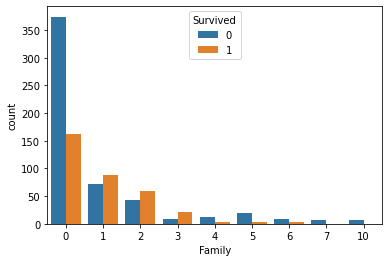

In [43]:
sns.countplot(data=train,
              x= 'Family',
              hue='Survived')

### Cut함수를 이용한 Binning(수치->범주)
- 사소한 관찰 오류를 줄여줄 수 있다.(모델의 단순화를 유도)


In [44]:
bins= [-1,0,3,20]# 데이터를 잘라낼 구간정보 설정
labels = ['Alone', 'Small', 'Large'] # 구간별 범주 이름]
cut_result = pd.cut(x=train['Family'], # 구간화할 데이터 설정
                    bins=bins, # 잘라낼 구간정보 설정
                    labels=labels) # 구간별 범주 이름 설정

In [45]:
cut_result

PassengerId
1      Small
2      Small
3      Alone
4      Small
5      Alone
       ...  
887    Alone
888    Alone
889    Small
890    Alone
891    Alone
Name: Family, Length: 891, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [46]:
train['Family_cat'] = cut_result

<AxesSubplot:xlabel='Family_cat', ylabel='count'>

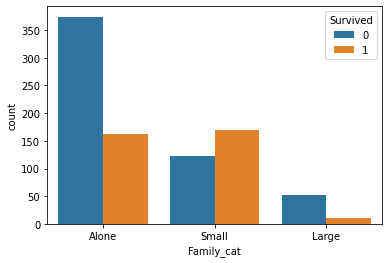

In [47]:
sns.countplot(data=train,
              x='Family_cat',
              hue='Survived' )

In [48]:
test['Family'] = test['SibSp'] + test['Parch']
bins= [-1,0,3,20]# 데이터를 잘라낼 구간정보 설정
labels = ['Alone', 'Small', 'Large'] # 구간별 범주 이름]
cut_result = pd.cut(x=test['Family'], # 구간화할 데이터 설정
                    bins=bins, # 잘라낼 구간정보 설정
                    labels=labels) # 구간별 범주 이름 설정

In [49]:
test['Family_cat'] = cut_result

## 비정형 데이터 다루기(Name)
- 이름 중간에 호칭을 추출해서 사용해보자

In [50]:
train['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [51]:
def split_title(row):
    return row.split(",")[1].split(".")[0].strip()

In [52]:
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

### countplot 시각화

<AxesSubplot:xlabel='Title', ylabel='count'>

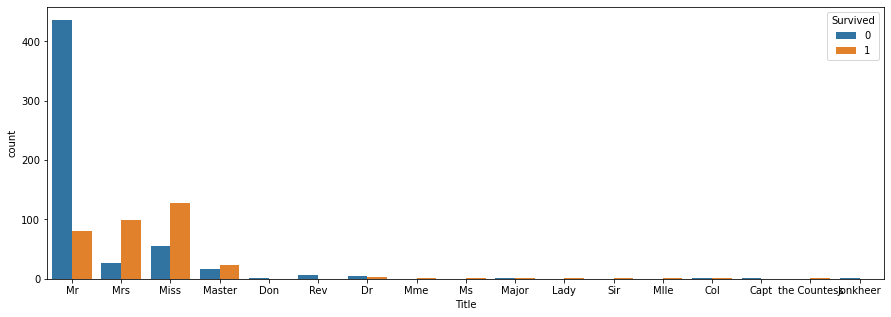

In [53]:
plt.figure(figsize=(15,5))  #그림판의 가로, 세로 크기 조정
sns.countplot(data=train,
              x='Title',
              hue='Survived')

In [54]:
# 일부 수치가 적은 호칭은 Other로 통일하자.
# Mr, Mrs, Miss, Master, Rev, Other

In [55]:
# map 함수 이용하기(데이터 치완시 사용)
title_dic = {
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Rev" : "Rev"
}

In [56]:
title_mapping = train["Title"].map(title_dic)
title_mapping[title_mapping.isnull()]

PassengerId
31     NaN
246    NaN
318    NaN
370    NaN
399    NaN
444    NaN
450    NaN
537    NaN
557    NaN
600    NaN
633    NaN
642    NaN
648    NaN
661    NaN
695    NaN
711    NaN
746    NaN
760    NaN
767    NaN
797    NaN
823    NaN
Name: Title, dtype: object

In [57]:
train['Title'] = title_mapping.fillna("Other")

In [58]:
# test 적용
title_mapping = test['Title'].map(title_dic)
test['Title'] = title_mapping.fillna("Other")

In [59]:
print(train["Title"].unique())
print(test["Title"].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Other' 'Rev']
['Mr' 'Mrs' 'Miss' 'Master' 'Other' 'Rev']


### 사용하지 않을 커럼 정리

In [60]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family', 'Family_cat', 'Title'],
      dtype='object')

In [61]:
test.columns


Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Family', 'Family_cat', 'Title'],
      dtype='object')

In [62]:
train.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)

In [63]:
test.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis=1, inplace=True)

In [64]:
print("train.columns : ",train.columns)
print("test.columns : ",test.columns)

train.columns :  Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Family', 'Family_cat', 'Title'],
      dtype='object')
test.columns :  Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Family',
       'Family_cat', 'Title'],
      dtype='object')


# 모델링

- 인코딩(문자형태의 데이터를 숫자형태로 변환)
    1. label encoding(순서)
    2. one-hot encoding(순서상관없음)
- 특성선택(feature selection)
- 모델선택 및 하이퍼파라미터 튜닝
- 모델학습 및 평가

## 인코딩

In [65]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked',
       'Family', 'Family_cat', 'Title'],
      dtype='object')

In [66]:
# 인코딩할 컬럼명만 선택
categorical_features = ['Sex','Cabin','Embarked','Family_cat','Title']

In [67]:
pd.get_dummies(train['Sex'])

,female,male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1
...,...,...
887,0,1
888,1,0
889,1,0


In [68]:
# 반복문으로 인코딩하기
for feature_name in categorical_features :
    one_hot = pd.get_dummies(train[feature_name], prefix=feature_name)
    train = pd.concat([train,one_hot],axis=1) # 기존 데이터 끝에 one_hot을 붙임
    train.drop(feature_name, axis=1, inplace=True)


In [69]:
# 반복문으로 인코딩하기
for feature_name in categorical_features :
    one_hot = pd.get_dummies(test[feature_name], prefix=feature_name)
    test = pd.concat([test,one_hot],axis=1) # 기존 데이터 끝에 one_hot을 붙임
    test.drop(feature_name, axis=1, inplace=True)


In [70]:
test.head()

,Pclass,Age,Fare,Family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Embarked_S,Family_cat_Alone,Family_cat_Small,Family_cat_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,7.8292,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
893,3,47,7.0000,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
894,2,62,9.6875,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
895,3,27,8.6625,0,0,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
896,3,22,12.2875,2,1,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [71]:
train.head()

,Survived,Pclass,Age,Fare,Family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,...,Embarked_S,Family_cat_Alone,Family_cat_Small,Family_cat_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,22,7.2500,1,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,1,1,38,71.2833,1,1,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,1,3,26,7.9250,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
4,1,1,35,53.1000,1,1,0,0,0,1,...,1,0,1,0,0,0,0,1,0,0
5,0,3,35,8.0500,0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,0,0


In [72]:
train.shape, test.shape

((891, 28), (418, 26))

In [73]:
# 집한연산으로 다른 컬름으 확인해보자.
set(train.columns) - set(test.columns)

{'Cabin_T', 'Survived'}

In [74]:
# 훈련용 데이터는 Cabin에 T가 존재햇지만
# 테스트 데이터는 Cabin에 T가 없어서 one_hot 인코딩시 걸림이 안만들어졌다.
# 테스트 데이터 끝에 Cabin_T를 추가하자
test['Cabin_T'] = 0

In [75]:
test.head()

,Pclass,Age,Fare,Family,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Family_cat_Alone,Family_cat_Small,Family_cat_Large,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev,Cabin_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,34,7.8292,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
893,3,47,7.0000,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
894,2,62,9.6875,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
895,3,27,8.6625,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
896,3,22,12.2875,2,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [76]:
# 훈련용 데이터와 테스트 데이터의 인덱스 순서가 다르기떄문에 정렬해주자.
train.sort_index(axis=1, inplace=True)
test.sort_index(axis=1, inplace=True)

In [77]:
train.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family', 'Family_cat_Alone', 'Family_cat_Large',
       'Family_cat_Small', 'Fare', 'Pclass', 'Sex_female', 'Sex_male',
       'Survived', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Other', 'Title_Rev'],
      dtype='object')

In [78]:
test.columns

Index(['Age', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family', 'Family_cat_Alone', 'Family_cat_Large',
       'Family_cat_Small', 'Fare', 'Pclass', 'Sex_female', 'Sex_male',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Other',
       'Title_Rev'],
      dtype='object')

## 특성선택
- 예측결과에 영향을 줄 특성들을 골라본다
- Family와 Family_cat이 비슷한 특성이기 때문에 선택해보자.

### 문제와 답 만들기

In [79]:
X_train = train.drop(['Survived','Family'], axis=1)
y_train = train.Survived
X_test = test.drop('Family', axis=1)

In [80]:
X_train.shape, y_train.shape

((891, 26), (891,))

In [81]:
X_test.shape

(418, 26)

## 학습
- KNN모델과 DcisionTree모델 활용

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [83]:
# 모델 생성
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

In [84]:
# 모델 학습
knn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
# 모델 예측
knn_pre = knn_model.predict(X_test)
tree_pre = tree_model.predict(X_test)

In [86]:
# 정답파일 만들기
submission = pd.read_csv('./data/gender_submission.csv')

In [87]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [88]:
submission['Survived'] = knn_pre

In [89]:
# 데이터 프레임을 csv파일로 저장
submission.to_csv('./data/knn_pre.csv', index=False)

In [90]:
submission['Survived'] = tree_pre
submission.to_csv('./data/tree_pre.csv', index=False)

# 데이터 스케일링(Data scaling)
- 특성(Feature)들의 범위(range)를 정규화 해주는 작업
- 특성마다 다른 범위를 가지는 경우 머신러닝 모델들이 제대로
학습되지 않을 가능성이 있다. 
    (KNN, SVM, Neural network 모델, Clustering 모델 등)


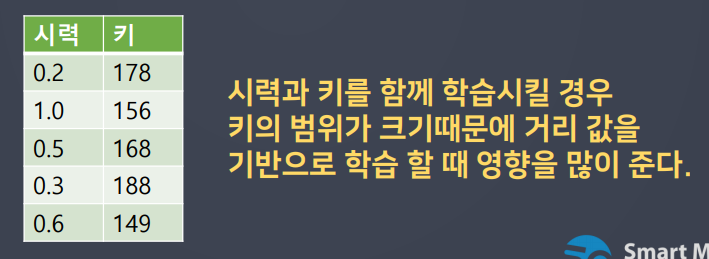

## 데이터 스케일링(Data scaling) 장점


- 특성들을 비교 분석하기 쉽게 만들어 준다.
-  Linear Model, Neural network Model 등에서 학습의
안정성과 속도를 개선시킨다.
-  하지만 특성에 따라 원래 범위를 유지하는게 좋을 경우는
scaling을 하지 않아도 된다.

## 데이터 스케일링(Data scaling) 종류
- StandardScaler
    - 변수의 평균,표준편차를 이용해 정규분포 형태로 변환 (평균 0, 분산 1) 이상치(Outlier)에 민감하게 영향을 받는다.
- RobustScaler
    - 변수의 사분위수를 이용해 변환
    - 이상치(Outlier)가 있는 데이터 변환시 사용 할 수 있다.
- MinMaxScaler
    - 변수의 Max 값, Min 값을 이용해 변환 (0 ~ 1 사이 값으로 변환)
    - 이상치(Outlier)에 민감하게 영향을 받는다.
- Normalizer
    - 특성 벡터의 길이가 1이 되도록 조정 (행마다 정규화 진행)
    - 특성 벡터의 길이는 상관 없고 데이터의 방향(각도)만 중요할 때 사용

## 데이터 스케일링(Data scaling) 주의점
- 훈련세트와 테스트세트에 같은 변환을 적용해야 한다
    - 예를 들어 StandardScaler의 경우 훈련세트의 평균과 표준편차를
이용해 훈련세트를 변환하고, 테스트세트의 평균과 표준편차를 이용
해 테스트세트를 변환하면 잘못된 결과가 나온다.


#### 데이터 스케일링
- 각 feature의 스케일이 다르면 예측결과가 안좋은 경우가 있다.
- KNN, SVM, 신경망모델, Clustering

In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
# 스케일러 생성 (평균과 표준편차)
std_scaler = StandardScaler()

In [93]:
# 기준값 생성 (평균, 표준편차)
std_scaler.fit(X_train[['Fare']])

StandardScaler()

In [94]:
# 데이터 변형
scaled_fare = std_scaler.transform(X_train[['Fare']])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

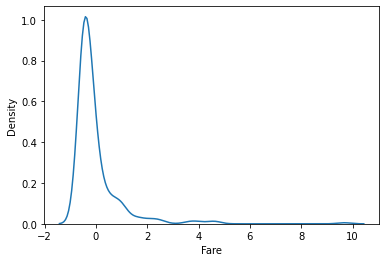

In [95]:
X_train['Fare'] = scaled_fare
sns.kdeplot(data=X_train, x='Fare')

In [96]:
scaled_fare = std_scaler.transform(X_test[['Fare']])
X_test['Fare'] = scaled_fare

<AxesSubplot:xlabel='Fare', ylabel='Density'>

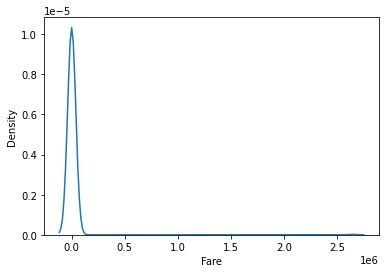

In [97]:
X_test['Fare'] = scaled_fare
sns.kdeplot(data=X_test, x='Fare')